# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [108]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

# initialize variables
weather_data = []
cityCount = 0
citySet = 1

# initialize lists to store data
city_list = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []


print("Beginning Data Retrieval")
print("----------------------------")

# loop through list of cities to make api calls
for city in cities:
    response = requests.get(url + city + "&appid=" + api_key).json()
    
    # checks if city is not listed
    if response["cod"] == "404":
        print("City not found. Skipping...")
    
    else:
        # tracks city count and set
        if cityCount == 50:
            cityCount = 0
            citySet = citySet + 1
        
        cityCount = cityCount + 1
        print(f"Processing city {cityCount} of Set {citySet} | {city}")
        
        # store desired info in separate lists
        city_list.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        
        
weather_data = zip(city_list, cloud, country, date, humidity, lat, lng, temp, wind)


Beginning Data Retrieval
----------------------------
Processing city 1 of Set 1 | barra do garcas
Processing city 2 of Set 1 | ponta do sol
Processing city 3 of Set 1 | mataura
Processing city 4 of Set 1 | punta arenas
Processing city 5 of Set 1 | khatanga
Processing city 6 of Set 1 | prince george
Processing city 7 of Set 1 | fortuna
Processing city 8 of Set 1 | nouadhibou
Processing city 9 of Set 1 | hermanus
Processing city 10 of Set 1 | yellowknife
Processing city 11 of Set 1 | severo-kurilsk
Processing city 12 of Set 1 | sulangan
Processing city 13 of Set 1 | hofn
City not found. Skipping...
Processing city 14 of Set 1 | bluff
Processing city 15 of Set 1 | hovd
Processing city 16 of Set 1 | new norfolk
City not found. Skipping...
Processing city 17 of Set 1 | cape town
Processing city 18 of Set 1 | rikitea
Processing city 19 of Set 1 | lac-megantic
City not found. Skipping...
Processing city 20 of Set 1 | roma
City not found. Skipping...
Processing city 21 of Set 1 | carnarvon
Pr

Processing city 47 of Set 4 | slonim
Processing city 48 of Set 4 | luziania
Processing city 49 of Set 4 | turukhansk
Processing city 50 of Set 4 | gamboma
Processing city 1 of Set 5 | apache junction
Processing city 2 of Set 5 | omaha
Processing city 3 of Set 5 | kutum
Processing city 4 of Set 5 | tuktoyaktuk
Processing city 5 of Set 5 | hilton head island
Processing city 6 of Set 5 | lakatoro
Processing city 7 of Set 5 | castro
Processing city 8 of Set 5 | vila do maio
City not found. Skipping...
Processing city 9 of Set 5 | sarangani
City not found. Skipping...
Processing city 10 of Set 5 | rio gallegos
Processing city 11 of Set 5 | borodino
Processing city 12 of Set 5 | payo
Processing city 13 of Set 5 | chipata
Processing city 14 of Set 5 | poum
Processing city 15 of Set 5 | ugoofaaru
Processing city 16 of Set 5 | kaitangata
Processing city 17 of Set 5 | poshekhonye
Processing city 18 of Set 5 | san cristobal
Processing city 19 of Set 5 | sayat
Processing city 20 of Set 5 | solnech

Processing city 36 of Set 8 | solwezi
Processing city 37 of Set 8 | key west
Processing city 38 of Set 8 | belaya gora
Processing city 39 of Set 8 | juli
Processing city 40 of Set 8 | falmouth
Processing city 41 of Set 8 | lompoc
Processing city 42 of Set 8 | gewane
Processing city 43 of Set 8 | saint anthony
City not found. Skipping...
Processing city 44 of Set 8 | caravelas
Processing city 45 of Set 8 | isangel
Processing city 46 of Set 8 | pangai
Processing city 47 of Set 8 | honiara
Processing city 48 of Set 8 | cordoba
City not found. Skipping...
Processing city 49 of Set 8 | marion
Processing city 50 of Set 8 | nanpara
Processing city 1 of Set 9 | vao
Processing city 2 of Set 9 | manoel urbano
Processing city 3 of Set 9 | dakar
Processing city 4 of Set 9 | scarborough
Processing city 5 of Set 9 | tuatapere
Processing city 6 of Set 9 | florianopolis
Processing city 7 of Set 9 | lampang
Processing city 8 of Set 9 | olga
Processing city 9 of Set 9 | mocorito
Processing city 10 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [109]:
import csv

# write to csv
with open('cities_data.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(weather_data)
csvFile.close()

City          558
Cloudiness    558
Country       556
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [128]:
# create dataframe
cities_df = pd.read_csv("cities_data.csv", names=["City", "Cloudiness", "Country", 
                                                    "Date", "Humidity", "Lat",      
                                                    "Lng", "Max Temp", "Wind Speed"])
# remove any rows with missing info
cities_df = cities_df.dropna(how="any")

# confirm count
cities_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [129]:
# convert to fahreinheit
fahr = (cities_df["Max Temp"] - 273.15) * 9/5 + 32
cities_df["Max Temp"] = fahr
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barra do Garcas,0,BR,1561780063,60,-15.89,-52.26,65.7896,0.88
1,Ponta do Sol,0,BR,1561780064,80,-20.63,-46.00,59.2736,2.56
2,Mataura,100,NZ,1561780064,61,-46.19,168.86,55.9940,4.47
3,Punta Arenas,40,CL,1561780221,87,-53.16,-70.91,33.8000,2.10
4,Khatanga,100,RU,1561780099,84,71.98,102.47,56.3936,8.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

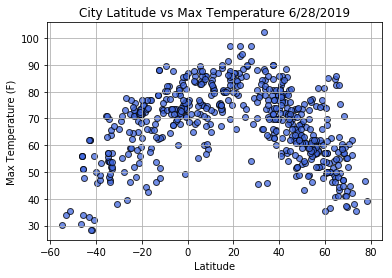

In [136]:
# create temperature scatter plot
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", 
            facecolors="royalblue", edgecolors="black", alpha=0.75)

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature 6/28/2019")
plt.show()

#### Latitude vs. Humidity Plot

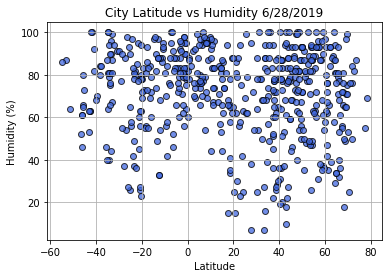

In [137]:
# create humidity scatter plot
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", 
            facecolors="royalblue", edgecolors="black", alpha=0.75)

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity 6/28/2019")
plt.show()

#### Latitude vs. Cloudiness Plot

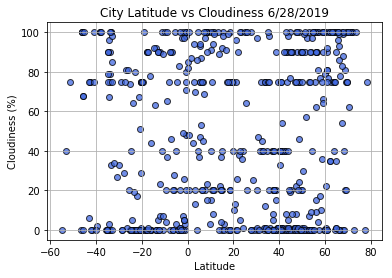

In [138]:
# create cloud coverage scatter plot
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", 
            facecolors="royalblue", edgecolors="black", alpha=0.75)

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness 6/28/2019")
plt.show()

#### Latitude vs. Wind Speed Plot

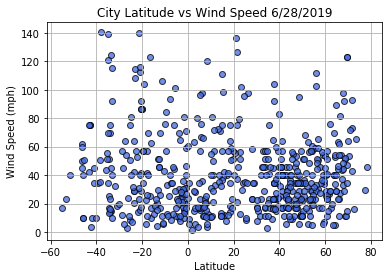

In [139]:
# convert to wind speed (m/s to mph)
mph = cities_df["Wind Speed"] * 2.237
cities_df["Wind Speed"] = mph
cities_df.head()

# create wind speed scatter plot
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", 
            facecolors="royalblue", edgecolors="black", alpha=0.75)

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed 6/28/2019")
plt.show()